In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import re
sns.set()
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
#df=pd.read_csv('./data_csv/ntcir12.csv',sep=',', index_col='Unnamed: 0')
df=pd.read_csv('./data_csv/rgb_final_dataframe_ordenat.csv',sep='\t', index_col='Unnamed: 0')

In [3]:
tags=['person','chair', 'book', 'tvmonitor', 'laptop', 'bottle','cup', 'car','diningtable', 'cell phone',
             'keyboard', 'bowl', 'mouse', 'clock','toilet', 'sink', 'remote', 'suitcase', 'pottedplant','refrigerator',
             'knife', 'handbag', 'vase', 'aeroplane', 'cat','bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush',
             'traffic light', 'bicycle', 'train', 'bird', 'microwave', 'bench','fork', 'oven', 'motorbike', 'donut',
             'wine glass', 'pizza','apple', 'scissors', 'umbrella', 'cake', 'bus', 'truck','banana', 'parking meter',
             'sandwich', 'sports ball', 'broccoli','carrot', 'orange', 'teddy bear', 'dog', 'snowboard','skateboard', 'boat',
             'surfboard', 'frisbee', 'skis', 'hot dog','bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite',
             'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant','horse', 'cow', 'giraffe', 'baseball glove']

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.head(5)

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,G_bin7,G_bin8,B_bin1,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7,B_bin8
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.034097,0.052746,0.022873,0.256494,0.174103,0.303694,0.250870,0.168284,0.019045,0.061411
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.000065,0.000076,0.067223,0.143474,0.209524,0.444543,0.343550,0.001700,0.000072,0.000061
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.005265,0.014378,0.155595,0.260709,0.214408,0.441503,0.075073,0.009980,0.005148,0.011784
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.003570,0.003003,0.136579,0.447956,0.280991,0.263809,0.031977,0.004851,0.002074,0.001339
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.008912,0.000051,0.044834,0.181883,0.267774,0.521107,0.135849,0.002264,0.002486,0.053487


In [6]:
# import modules 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
#import different Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#import other features
from sklearn.metrics import accuracy_score

In [8]:
# will use KNN as the initial classifier
acc_neigh=[]
X1=df[tags]
y1=df['activity']
for neighbor in xrange(1,12): #iterate using different neighbours from 1 to 10
    acc= []
    for i in xrange(10): #iterate 10 times for every neighbour
        x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3) 
        knn= KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(x_train1,y_train1)
        acc.append(knn.score(x_test1,y_test1)) # accuracy score
    acc_neigh.append(np.mean(acc)) # append mean value for every neighbour
    print 'neighbor {} processed'.format(neighbor)
   

neighbor 1 processed
neighbor 2 processed
neighbor 3 processed
neighbor 4 processed
neighbor 5 processed
neighbor 6 processed
neighbor 7 processed
neighbor 8 processed
neighbor 9 processed
neighbor 10 processed
neighbor 11 processed


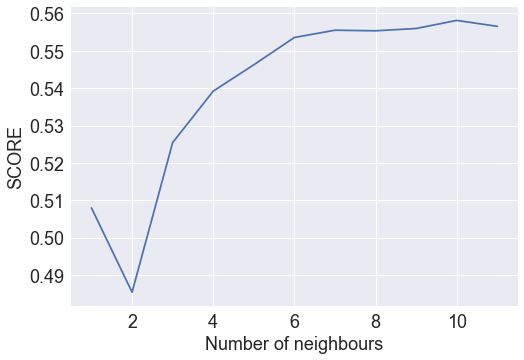

In [9]:
# plot the results
scores = acc_neigh
plt.plot(np.arange(1,12),scores)
plt.xlabel('Number of neighbours',fontsize= 18)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.ylabel('SCORE',fontsize= 18)
plt.show()         

In [ ]:
PRC = 0.3
acc_r=np.zeros((10,5))
X=df[tags]
y=df['activity']
for i in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    nn2 = KNeighborsClassifier(n_neighbors=2)
    nn5 = KNeighborsClassifier(n_neighbors=5)
    svc = SVC()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier(n_estimators=100)
    
    nn2.fit(X_train,y_train)
    nn5.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    rf.fit(X_train,y_train)   
    
    y_pred_nn2=nn2.predict(X_test)
    y_pred_nn5=nn5.predict(X_test)
    y_pred_svc=svc.predict(X_test)
    y_pred_dt=dt.predict(X_test)
    y_pred_rf=rf.predict(X_test)
    
    acc_r[i][0] = accuracy_score(y_pred_nn2, y_test)
    acc_r[i][1] = accuracy_score(y_pred_nn5, y_test)
    acc_r[i][2] = accuracy_score(y_pred_svc, y_test)
    acc_r[i][3] = accuracy_score(y_pred_dt, y_test)
    acc_r[i][4] = accuracy_score(y_pred_rf, y_test)

In [ ]:
plt.boxplot(acc_r);
for i in xrange(5):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['2-NN','5-NN','SVM','D. Tree', 'R. Forest'],fontsize= 18)
plt.yticks(fontsize= 18)
plt.ylabel('SCORE',fontsize= 18)
plt.show()

In [10]:
PRC = 0.3
X=df[tags]
y=df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)   
y_pred_rf=rf.predict(X_test)
print accuracy_score(y_test,y_pred_rf)

0.582077051926


In [11]:
print classification_report(y_test,y_pred_rf)

                             precision    recall  f1-score   support

        attending a seminar       0.46      0.45      0.46       312
                     biking       0.53      0.42      0.47        77
        cleaning and chores       0.42      0.30      0.35       249
                    cooking       0.47      0.38      0.42       171
                    driving       0.58      0.59      0.59       913
having drinks with somebody       0.47      0.48      0.47       404
   having drinks\meal alone       0.59      0.47      0.53       455
  having meal with somebody       0.68      0.61      0.64       306
                    meeting       0.51      0.42      0.46       529
                     mobile       0.58      0.62      0.60      1420
                      plane       0.52      0.48      0.50       287
                    reading       0.55      0.48      0.51       337
                    resting       0.67      0.81      0.74      1458
                   shopping      

In [12]:
y_train[y_train == 'biking'].count()

174

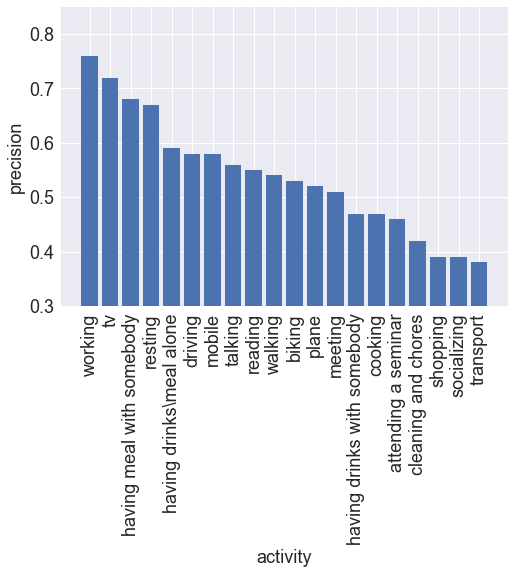

In [13]:
a = classification_report(y_test,y_pred_rf)
a= a.split('\n')
precision=[]
x_act = sorted(y.unique())
for i,v in enumerate(a):
    if i>=2:      
        if (v != ''):
            if 'avg' not in v:                
                value= float(v[33:39])
                precision.append(value)                

activity_score={}
for i,v in enumerate(x_act):
    activity_score[v]=precision[i]
    
list= sorted(activity_score.items(), key=lambda x:x[1],reverse=True)
#print list
x_val = [x[0] for x in list]
y_val = [x[1] for x in list]

x_num= np.arange(len(x_val))
plt.xticks(x_num,x_val,rotation= 90,fontsize= 18)
plt.bar(x_num,y_val)
plt.xlabel('activity',fontsize = 18)
plt.ylim([0.3,0.85])
plt.ylabel('precision',fontsize=18)
plt.yticks(fontsize= 18)
plt.show()

[('walking', 5384), ('working', 4534), ('resting', 3351), ('mobile', 3274), ('transport', 2682), ('driving', 1953), ('talking', 1824), ('socializing', 1299), ('meeting', 1247), ('having drinks\\meal alone', 1132), ('having drinks with somebody', 1014), ('tv', 868), ('reading', 830), ('shopping', 762), ('plane', 743), ('having meal with somebody', 727), ('attending a seminar', 711), ('cleaning and chores', 544), ('cooking', 376), ('biking', 174)]


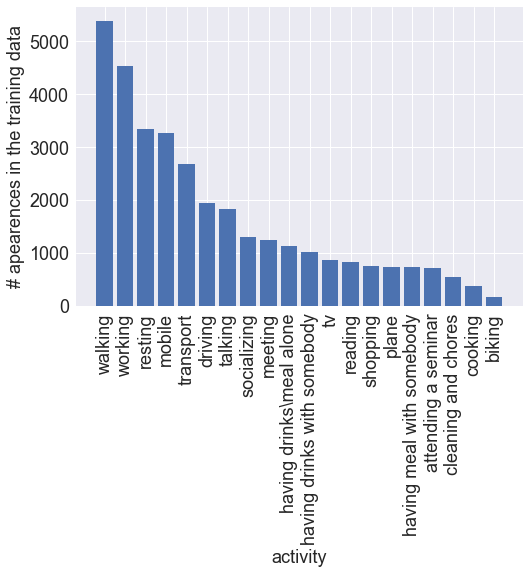

In [14]:
activity_occurences={}
for val in x_val:
    activity_occurences[val]=y_train[y_train==val].count()
    
list1= sorted(activity_occurences.items(), key=lambda x:x[1],reverse=True)
print list1
x_val = [x[0] for x in list1]
y_val = [x[1] for x in list1]

x_num= np.arange(len(x_val))
plt.xticks(x_num,x_val,rotation= 90,fontsize= 18)
plt.bar(x_num,y_val,log=False)
plt.xlabel('activity',fontsize = 18)
plt.ylabel('# apearences in the training data',fontsize=18)
plt.yticks(fontsize= 18)
plt.show()    


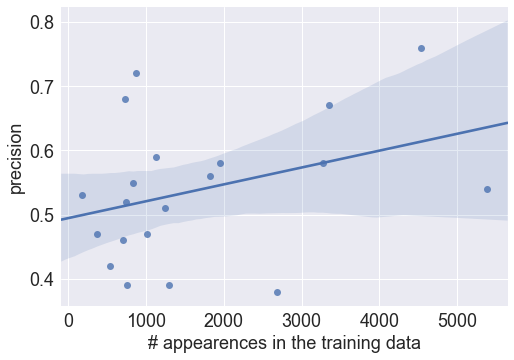

In [15]:
values = np.zeros((len(list),2))
for i in range(len(list)):
    tag = list[i][0]
    valor = list[i][1]
    values[i,1]=activity_occurences[tag]
    values[i,0] = valor
    
sns.regplot(values[:,1], values[:,0],order=1)
plt.xlabel('# appearences in the training data',fontsize = 18)
plt.ylabel('precision',fontsize=18)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.show()     

In [17]:
def plot_confusion_matrix(test, pred,normalize=False):
    cm=confusion_matrix(test,pred)
    
    if normalize: 
        cm = cm.astype('float')/cm.sum(axis= 1)
        plt.imshow(cm,cmap=plt.cm.jet, interpolation='nearest')
        plt.colorbar()
        plt.xlabel('predict label',fontsize= 18)
        plt.ylabel('true label',fontsize= 18)
        x_act= np.sort(y.unique())   
        plt.xticks(np.arange(0,len(x_act)),x_act,rotation=90,fontsize= 18)
        plt.yticks(np.arange(0,len(x_act)),x_act,rotation=0,fontsize= 18)
        plt.grid('off')
        plt.show()
        return cm
    else:
        plt.imshow(cm,cmap=plt.cm.jet, interpolation='nearest')
        plt.colorbar()
        plt.xlabel('predict label',fontsize= 18)
        plt.ylabel('true label',fontsize= 18)
        x_act= np.sort(y.unique())   
        plt.xticks(np.arange(0,len(x_act)),x_act,rotation=90,fontsize= 18)
        plt.yticks(np.arange(0,len(x_act)),x_act,rotation=0,fontsize= 18)
        plt.grid('off')
        plt.show()
        return cm
    
    

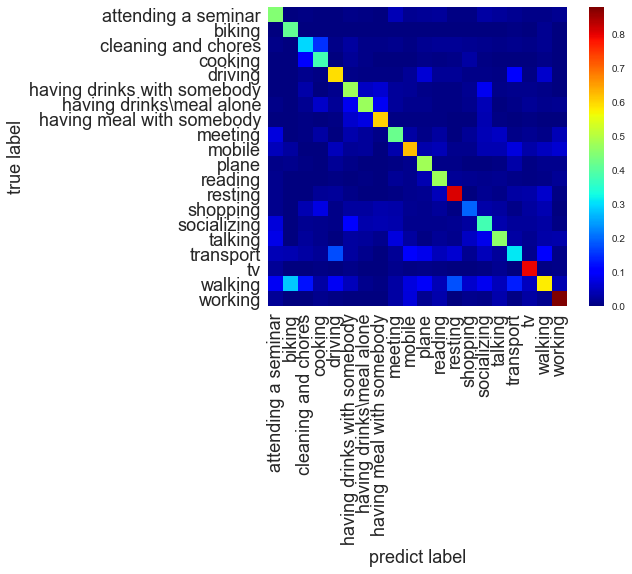

array([[  4.48717949e-01,   0.00000000e+00,   4.01606426e-03,
          0.00000000e+00,   1.09529025e-03,   7.42574257e-03,
          4.39560440e-03,   0.00000000e+00,   4.34782609e-02,
          1.47887324e-02,   1.74216028e-02,   2.37388724e-02,
          4.11522634e-03,   5.69800570e-03,   3.04182510e-02,
          2.19354839e-02,   1.44557823e-02,   8.52272727e-03,
          8.61697544e-03,   1.41435306e-02],
       [  0.00000000e+00,   4.15584416e-01,   0.00000000e+00,
          0.00000000e+00,   2.19058050e-03,   0.00000000e+00,
          2.19780220e-03,   0.00000000e+00,   0.00000000e+00,
          1.40845070e-03,   0.00000000e+00,   0.00000000e+00,
          6.85871056e-04,   2.84900285e-03,   0.00000000e+00,
          0.00000000e+00,   4.25170068e-03,   0.00000000e+00,
          1.42180095e-02,   0.00000000e+00],
       [  9.61538462e-03,   0.00000000e+00,   2.97188755e-01,
          1.52046784e-01,   8.76232202e-03,   2.72277228e-02,
          8.79120879e-03,   9.80392157e-03

In [18]:
plot_confusion_matrix(y_test,y_pred_rf,normalize=True)

In [19]:
print "classification accuracy:", accuracy_score(y_test, y_pred_rf)
print "classification accuracy:", rf.score(X_test, y_test)

classification accuracy: 0.582077051926
classification accuracy: 0.582077051926


In [20]:
mask =  df['location'] == 'Home'
mask = mask.astype(int)

In [21]:
df1=df.copy()

In [22]:
#em afegit una columna 1 o 0 depen de si està a casa o no:
df1['Home'] = mask

In [23]:
mask = df['day_of_week'] > 4
mask = mask.astype(int)

In [24]:
#em afegit una columna 1 o 0 depen de si cap de setmana o no
df1['Weekend'] = mask

In [25]:
tags1=['person','chair', 'book', 'tvmonitor', 'laptop', 'bottle','cup', 'car','diningtable', 'cell phone',
             'keyboard', 'bowl', 'mouse', 'clock','toilet', 'sink', 'remote', 'suitcase', 'pottedplant','refrigerator',
             'knife', 'handbag', 'vase', 'aeroplane', 'cat','bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush',
             'traffic light', 'bicycle', 'train', 'bird', 'microwave', 'bench','fork', 'oven', 'motorbike', 'donut',
             'wine glass', 'pizza','apple', 'scissors', 'umbrella', 'cake', 'bus', 'truck','banana', 'parking meter',
             'sandwich', 'sports ball', 'broccoli','carrot', 'orange', 'teddy bear', 'dog', 'snowboard','skateboard', 'boat',
             'surfboard', 'frisbee', 'skis', 'hot dog','bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite',
             'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant','horse', 'cow', 'giraffe', 'baseball glove','Home','Weekend']


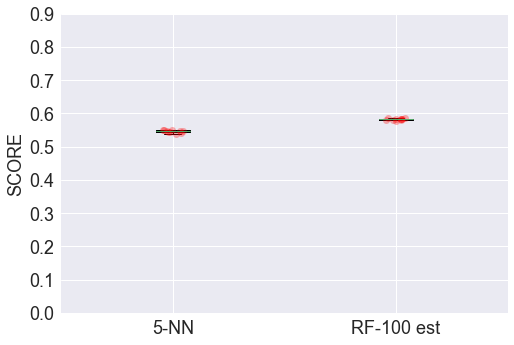

In [27]:
#FULL DETAIL DATA: probability 
y = df1['activity']
X = df1[tags]

PRC = 0.3
acc_r=np.zeros((10,2))
for i in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    knn = KNeighborsClassifier(n_neighbors=5)
    rf = RandomForestClassifier(n_estimators=100)
    knn.fit(X_train,y_train)
    rf.fit(X_train,y_train)   
    y_pred_knn= knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    acc_r[i][0] = accuracy_score(y_test,y_pred_knn)
    acc_r[i][1] = accuracy_score(y_test,y_pred_rf)
    
plt.boxplot(acc_r)
for i in xrange(2):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['5-NN','RF-100 est'],fontsize= 18)
plt.yticks(fontsize= 18)
plt.ylim([0, 0.9])
plt.ylabel('SCORE',fontsize= 18)
plt.show()


In [28]:
print classification_report(y_test,y_pred_rf)

                             precision    recall  f1-score   support

        attending a seminar       0.51      0.42      0.46       309
                     biking       0.67      0.45      0.54        73
        cleaning and chores       0.46      0.33      0.39       233
                    cooking       0.51      0.43      0.47       168
                    driving       0.54      0.59      0.56       836
having drinks with somebody       0.46      0.45      0.45       435
   having drinks\meal alone       0.60      0.43      0.50       473
  having meal with somebody       0.62      0.67      0.65       282
                    meeting       0.49      0.38      0.43       526
                     mobile       0.58      0.63      0.60      1444
                      plane       0.64      0.54      0.59       315
                    reading       0.56      0.47      0.51       340
                    resting       0.66      0.79      0.72      1454
                   shopping      

In [29]:
y_train[y_train == 'biking'].count()

178

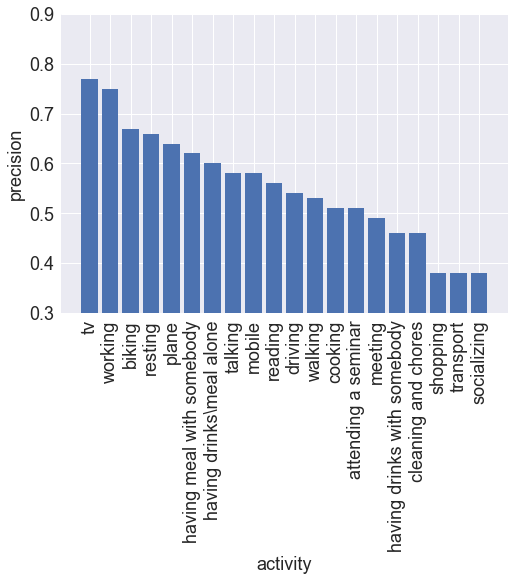

In [30]:
a = classification_report(y_test,y_pred_rf)
a= a.split('\n')
precision=[]
x_act = sorted(y.unique())
for i,v in enumerate(a):
    if i>=2:      
        if (v != ''):
            if 'avg' not in v:                
                value= float(v[33:39])
                precision.append(value)                

activity_score={}
for i,v in enumerate(x_act):
    activity_score[v]=precision[i]
    
list= sorted(activity_score.items(), key=lambda x:x[1],reverse=True)
#print list
x_val = [x[0] for x in list]
y_val = [x[1] for x in list]

x_num= np.arange(len(x_val))
plt.xticks(x_num,x_val,rotation= 90,fontsize= 18)
plt.bar(x_num,y_val)
plt.xlabel('activity',fontsize = 18)
plt.ylim([0.3,0.9])
plt.ylabel('precision',fontsize=18)
plt.yticks(fontsize= 18)
plt.show()

[('walking', 5443), ('working', 4505), ('resting', 3355), ('mobile', 3250), ('transport', 2675), ('driving', 2030), ('talking', 1775), ('socializing', 1283), ('meeting', 1250), ('having drinks\\meal alone', 1114), ('having drinks with somebody', 983), ('tv', 843), ('reading', 827), ('shopping', 799), ('having meal with somebody', 751), ('plane', 715), ('attending a seminar', 714), ('cleaning and chores', 560), ('cooking', 379), ('biking', 178)]


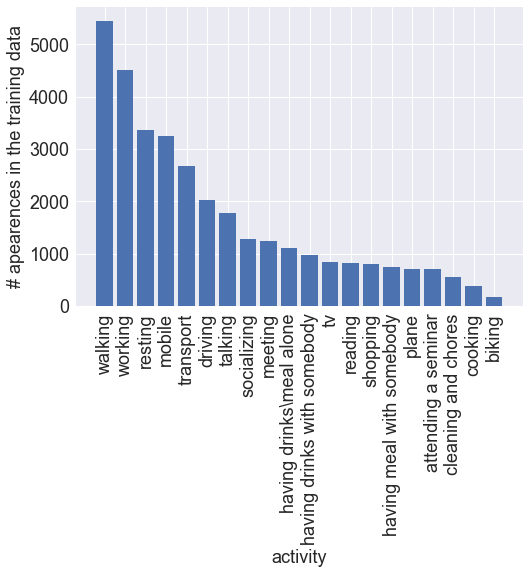

In [31]:
activity_occurences={}
for val in x_val:
    activity_occurences[val]=y_train[y_train==val].count()
    
list1= sorted(activity_occurences.items(), key=lambda x:x[1],reverse=True)
print list1
x_val = [x[0] for x in list1]
y_val = [x[1] for x in list1]

x_num= np.arange(len(x_val))
plt.xticks(x_num,x_val,rotation= 90,fontsize= 18)
plt.bar(x_num,y_val,log=False)
plt.xlabel('activity',fontsize = 18)
plt.ylabel('# apearences in the training data',fontsize=18)
plt.yticks(fontsize= 18)
plt.show()    


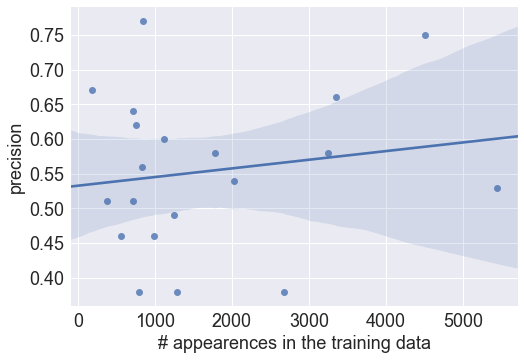

In [32]:
values = np.zeros((len(list),2))
for i in range(len(list)):
    tag = list[i][0]
    valor = list[i][1]
    values[i,1]=activity_occurences[tag]
    values[i,0] = valor
    
sns.regplot(values[:,1], values[:,0],order=1)
plt.xlabel('# appearences in the training data',fontsize = 18)
plt.ylabel('precision',fontsize=18)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.show()     

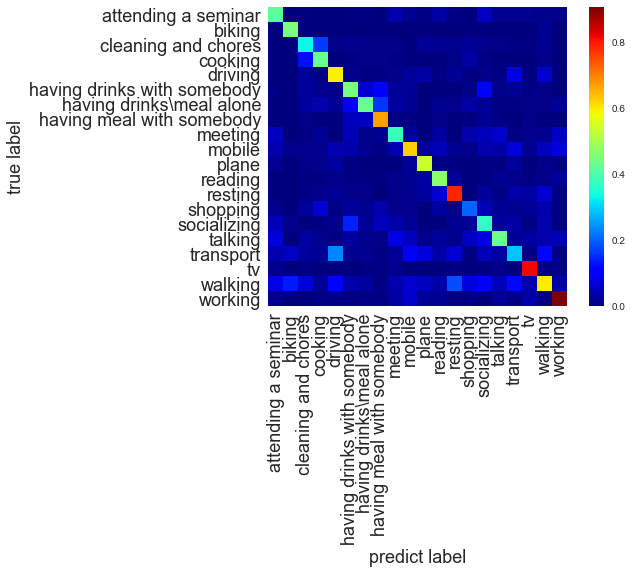

array([[  4.20711974e-01,   0.00000000e+00,   4.29184549e-03,
          0.00000000e+00,   2.39234450e-03,   4.59770115e-03,
          4.22832981e-03,   0.00000000e+00,   3.61216730e-02,
          1.66204986e-02,   6.34920635e-03,   2.94117647e-02,
          4.12654746e-03,   3.18471338e-03,   5.35055351e-02,
          1.57766990e-02,   1.52155537e-02,   1.59151194e-02,
          7.51547303e-03,   1.39318885e-02],
       [  0.00000000e+00,   4.52054795e-01,   0.00000000e+00,
          0.00000000e+00,   2.39234450e-03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.38504155e-03,   0.00000000e+00,   0.00000000e+00,
          6.87757909e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.69061708e-03,   0.00000000e+00,
          1.45888594e-02,   0.00000000e+00],
       [  3.23624595e-03,   0.00000000e+00,   3.34763948e-01,
          1.66666667e-01,   8.37320574e-03,   1.37931034e-02,
          1.05708245e-02,   7.09219858e-03

In [33]:
plot_confusion_matrix(y_test, y_pred_rf,normalize=True)

#calculo de RGB en ML

In [34]:
tags_rgb = ['R_bin1', 'R_bin2', 'R_bin3', 'R_bin4', 'R_bin5', 'R_bin6', 'R_bin7', 'R_bin8','G_bin1', 'G_bin2', 'G_bin3', 'G_bin4', 'G_bin5', 'G_bin6', 'G_bin7', 'G_bin8','B_bin1', 'B_bin2', 'B_bin3', 'B_bin4', 'B_bin5', 'B_bin6', 'B_bin7', 'B_bin8']

In [35]:
tags2 = tags1 + tags_rgb

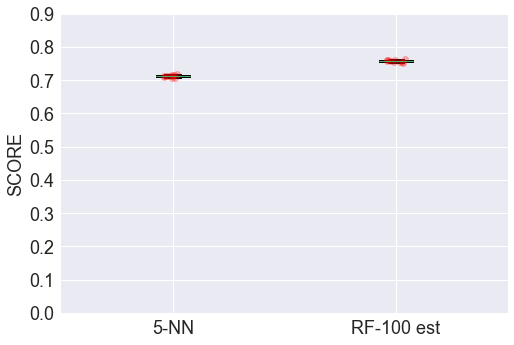

In [36]:
#FULL DETAIL DATA: probability with RGB
y = df1['activity']
X = df1[tags2]

PRC = 0.3
acc_r=np.zeros((10,2))
for i in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    knn = KNeighborsClassifier(n_neighbors=5)
    rf = RandomForestClassifier(n_estimators=100)
    knn.fit(X_train,y_train)
    rf.fit(X_train,y_train)   
    y_pred_knn= knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    acc_r[i][0] = accuracy_score(y_test,y_pred_knn)
    acc_r[i][1] = accuracy_score(y_test,y_pred_rf)
    
plt.boxplot(acc_r)
for i in xrange(2):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['5-NN','RF-100 est'],fontsize= 18)
plt.yticks(fontsize= 18)
plt.ylim([0, 0.9])
plt.ylabel('SCORE',fontsize= 18)
plt.show()

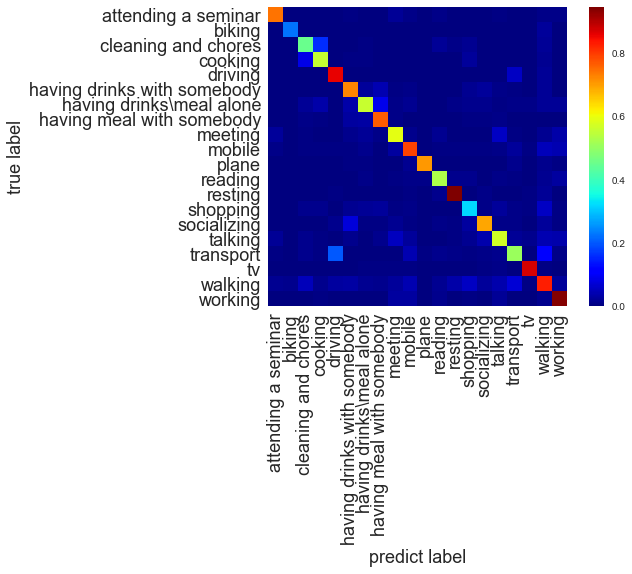

array([[  7.45161290e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.49438202e-03,
          0.00000000e+00,   0.00000000e+00,   2.11946050e-02,
          7.73558368e-03,   0.00000000e+00,   8.90207715e-03,
          2.08333333e-03,   3.06748466e-03,   1.78890877e-03,
          6.65778961e-03,   8.92857143e-04,   0.00000000e+00,
          8.62440707e-03,   1.10178384e-02],
       [  0.00000000e+00,   2.27848101e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          7.03234880e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.33155792e-03,   8.92857143e-04,   0.00000000e+00,
          2.50107805e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   4.51754386e-01,
          1.62921348e-01,   1.13378685e-03,   0.00000000e+00,
          4.11522634e-03,   3.32225914e-03

In [37]:
plot_confusion_matrix(y_test, y_pred_rf,normalize=True)

In [38]:
#asigning a value to each of the activities from 0 to 1 (normalized)
dic_act={}
val=np.linspace(0,1,20)
for i,v in enumerate(y.unique()):
    dic_act[v]=val[i]


In [39]:
df1.head(5)

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,B_bin1,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7,B_bin8,Home,Weekend
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.022873,0.256494,0.174103,0.303694,0.250870,0.168284,0.019045,0.061411,1,0
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.067223,0.143474,0.209524,0.444543,0.343550,0.001700,0.000072,0.000061,1,0
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.155595,0.260709,0.214408,0.441503,0.075073,0.009980,0.005148,0.011784,1,0
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.136579,0.447956,0.280991,0.263809,0.031977,0.004851,0.002074,0.001339,1,0
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.044834,0.181883,0.267774,0.521107,0.135849,0.002264,0.002486,0.053487,1,0


In [40]:
def get_previous_act(): # function to get the previous activity
    data=df1.activity.values
    val= []
    for item in range(len(data)):
        if item == 0:
            val.append(np.nan)
        else:
            if data[item]!=data[item-1]: #check if previous activity is different
                val.append(dic_act[data[item-1]])
                hold = data[item-1] #record that specific activity
                #print 'new activity',data[item], 'with respect', data[item-1], 'added previous value', dic_act[data[item-1]]
            else:
                val.append(dic_act[hold]) # methodology 1
                #val.append(dic_act[data[item-1]]) # methodology 2
                #print 'same activity',data[item], 'with respect', data[item-1], 'added previous value', dic_act[hold]
    return val

dummy= get_previous_act()

In [ ]:
df3=df1.copy()
df3['prev_activity'] = pd.Series(dummy, index=df.index)

In [42]:
tags=['prev_activity']

In [43]:
tags3= tags2+tags

In [44]:
df3 = df3.dropna(how='any',subset=["activity"],axis=0)

In [45]:
df3.head(5)

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7,B_bin8,Home,Weekend,prev_activity
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.256494,0.174103,0.303694,0.250870,0.168284,0.019045,0.061411,1,0,NaN
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.143474,0.209524,0.444543,0.343550,0.001700,0.000072,0.000061,1,0,0.0
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.260709,0.214408,0.441503,0.075073,0.009980,0.005148,0.011784,1,0,0.0
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.447956,0.280991,0.263809,0.031977,0.004851,0.002074,0.001339,1,0,0.0
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.181883,0.267774,0.521107,0.135849,0.002264,0.002486,0.053487,1,0,0.0


In [158]:
#FULL DETAIL DATA: probability 
y = df3[1:]['activity'] #remove the 1st data point
X = df3[1:][tags3] #remove the 1st data point

PRC = 0.3
acc_r=np.zeros((10,2))
for i in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    knn = KNeighborsClassifier(n_neighbors=5)
    rf = RandomForestClassifier(n_estimators=100)
    knn.fit(X_train,y_train)
    rf.fit(X_train,y_train)   
    y_pred_knn= knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    acc_r[i][0] = accuracy_score(y_test,y_pred_knn)
    acc_r[i][1] = accuracy_score(y_test,y_pred_rf)

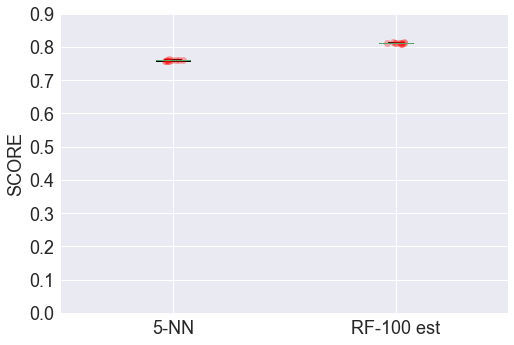

In [159]:
plt.boxplot(acc_r)
for i in xrange(2):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)

ax = plt.gca()
ax.set_xticklabels(['5-NN','RF-100 est'],fontsize= 18)
plt.yticks(fontsize= 18)
plt.ylim([0, 0.9])
plt.ylabel('SCORE',fontsize= 18)
plt.show()


In [166]:
y_train[y_train =='biking'].count()

176

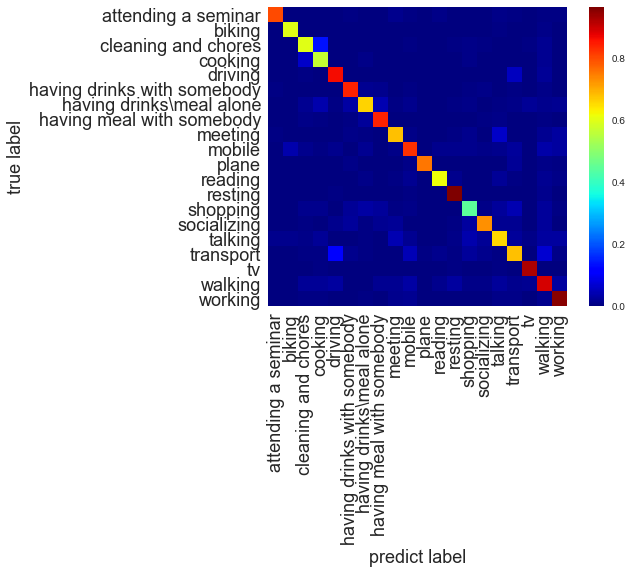

array([[  8.03278689e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.91400491e-03,
          0.00000000e+00,   0.00000000e+00,   1.31332083e-02,
          6.28053036e-03,   0.00000000e+00,   8.92857143e-03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          7.79220779e-03,   5.00000000e-03,   0.00000000e+00,
          5.76241135e-03,   7.26895119e-03],
       [  0.00000000e+00,   6.00000000e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.97836706e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.89610390e-03,   8.33333333e-04,   0.00000000e+00,
          1.10815603e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   6.02564103e-01,
          1.38364780e-01,   0.00000000e+00,   2.45700246e-03,
          2.13675214e-03,   0.00000000e+00

In [167]:
plot_confusion_matrix(y_test, y_pred_rf,normalize=True)

In [168]:
print classification_report(y_test,y_pred_rf)

                             precision    recall  f1-score   support

        attending a seminar       0.95      0.80      0.87       305
                     biking       0.92      0.60      0.73        75
        cleaning and chores       0.79      0.60      0.68       234
                    cooking       0.69      0.57      0.62       159
                    driving       0.82      0.87      0.84       866
having drinks with somebody       0.86      0.84      0.85       407
   having drinks\meal alone       0.82      0.66      0.73       468
  having meal with somebody       0.87      0.84      0.85       322
                    meeting       0.82      0.68      0.74       533
                     mobile       0.81      0.83      0.82      1433
                      plane       0.98      0.75      0.85       326
                    reading       0.92      0.62      0.74       336
                    resting       0.91      0.97      0.94      1407
                   shopping      

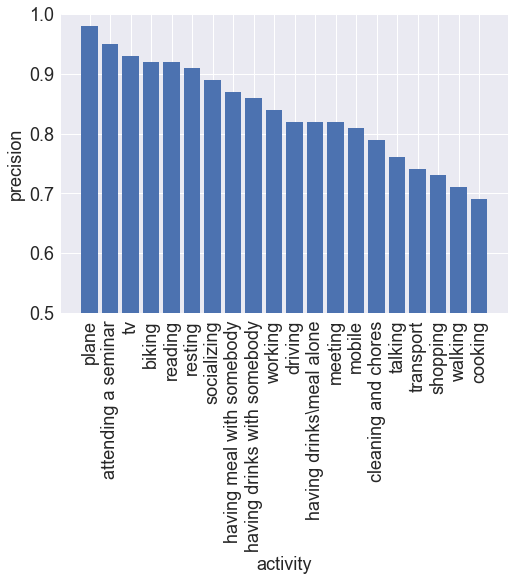

In [169]:
a = classification_report(y_test,y_pred_rf)
a= a.split('\n')
precision=[]
x_act = sorted(y.unique())
for i,v in enumerate(a):
    if i>=2:      
        if (v != ''):
            if 'avg' not in v:   
                value= float(v[33:39])
                precision.append(value)                

activity_score={}
for i,v in enumerate(x_act):
    activity_score[v]=precision[i]
    
list= sorted(activity_score.items(), key=lambda x:x[1],reverse=True)
#print list
x_val = [x[0] for x in list]
y_val = [x[1] for x in list]

x_num= np.arange(len(x_val))
plt.xticks(x_num,x_val,rotation= 90,fontsize= 18)
plt.bar(x_num,y_val)
plt.xlabel('activity',fontsize = 18)
plt.ylim([0.5,1.0])
plt.ylabel('precision',fontsize=18)
plt.yticks(fontsize= 18)
plt.show()

In [257]:
#train and test from diffent users
#TRAIN data is made up using user 1 and 2 information 
df_training = df3[df3['user'] !='u3']
y_original = df_training[1:]['activity']
# TEST data is made up using user 3 information only
df_testing =df3[df3['user']=='u3']
#####
#Remove the activities that are not present for user3 in the training data
df_training=df_training[df_training['activity']!= 'attending a seminar']
df_training=df_training[df_training['activity']!= 'biking']
df_training=df_training[df_training['activity']!= 'meeting']
y = df_training[1:]['activity']
X = df_training[1:][tags3]
y_data =df_testing['activity']

In [258]:
#print unique activity labels for train and test data
print np.sort(y_original.unique()) 
print np.sort(y_data.unique())

['attending a seminar' 'biking' 'cleaning and chores' 'cooking' 'driving'
 'having drinks with somebody' 'having drinks\\meal alone'
 'having meal with somebody' 'meeting' 'mobile' 'plane' 'reading' 'resting'
 'shopping' 'socializing' 'talking' 'transport' 'tv' 'walking' 'working']
['cleaning and chores' 'cooking' 'driving' 'having drinks with somebody'
 'having drinks\\meal alone' 'having meal with somebody' 'mobile' 'plane'
 'reading' 'resting' 'shopping' 'socializing' 'talking' 'transport' 'tv'
 'walking' 'working']


In [259]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,y)   # use the training data (u1 & u2)
y_pred_rf = rf.predict(test_data) # predict on the test data (u3)
print "classification accuracy:", accuracy_score(y_data, y_pred_rf)

classification accuracy: 0.429861927145


In [260]:
print classification_report(y_data,y_pred_rf)

                             precision    recall  f1-score   support

        cleaning and chores       0.18      0.39      0.25       158
                    cooking       0.70      0.22      0.33       179
                    driving       0.50      0.32      0.39       681
having drinks with somebody       0.61      0.14      0.23       831
   having drinks\meal alone       0.39      0.32      0.35       581
  having meal with somebody       0.19      0.34      0.24       198
                     mobile       0.74      0.62      0.67      2351
                      plane       0.32      0.06      0.10       328
                    reading       0.00      0.00      0.00        11
                    resting       0.75      0.37      0.49      2432
                   shopping       0.28      0.38      0.32       268
                socializing       0.31      0.03      0.06      1057
                    talking       0.05      0.15      0.07       257
                  transport      

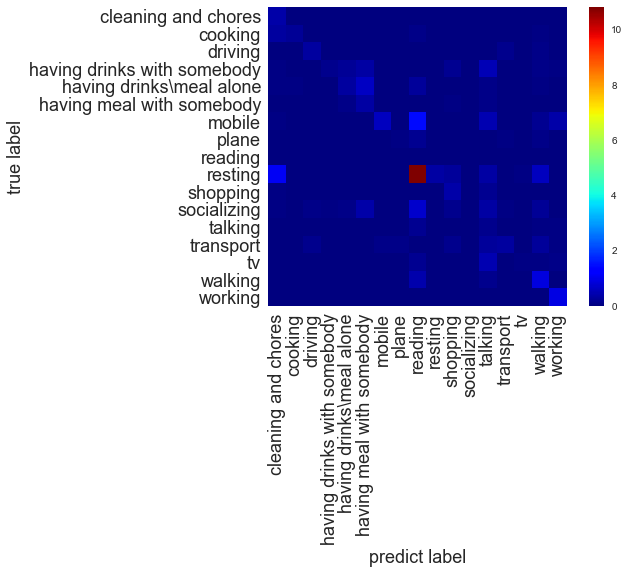

In [264]:
a=plot_confusion_matrix(y_data,y_pred_rf,normalize=True)

In [ ]:
#TEST MODEL FOR EVERY USER INDIVIDUALLY

In [265]:
df_user1=df3[df3['user']=='u1']
df_user2=df3[df3['user']=='u2']
df_user3=df3[df3['user']=='u3']
y1 = df_user1[1:]['activity']
X1 = df_user1[1:][tags3]
y2 = df_user2[1:]['activity']
X2 = df_user2[1:][tags3]
y3 = df_user3[1:]['activity']
X3 = df_user3[1:][tags3]

In [266]:
PRC = 0.3
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=PRC)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=PRC)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=PRC)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train1,y_train1)   
y_pred_rf1 = rf.predict(X_test1)
print "classification accuracy:", accuracy_score(y_test1, y_pred_rf1)
rf.fit(X_train2,y_train2)   
y_pred_rf2 = rf.predict(X_test2)
print "classification accuracy:", accuracy_score(y_test2, y_pred_rf2)
rf.fit(X_train1,y_train1)   
y_pred_rf3 = rf.predict(X_test3)
print "classification accuracy:", accuracy_score(y_test3, y_pred_rf3)

classification accuracy: 0.792037811307
classification accuracy: 0.827077182623
classification accuracy: 0.362790697674


image analysis

In [155]:
images =df3.loc['2015-02-23 08:00:00':'2015-02-23 21:00:00']['image_path'] #select a certain time 

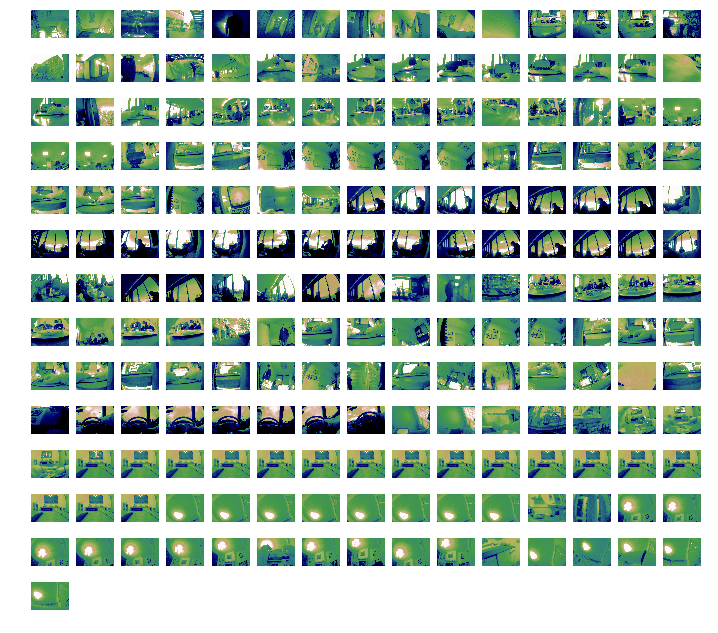

In [156]:
import scipy.misc as misc
nrows, ncols = 15, 15
plt.figure(figsize=(12,12))

for j,image in enumerate(images[::5]):
    root_file = './data'
    data = plt.imread(root_file+image)[:,:,0]
    plt.subplot(nrows, ncols,j+1)
    misc.imresize(data, (400, 400))
    plt.imshow(data,cmap='gist_earth')
    plt.axis('off')
plt.show()


In [153]:
def change_flag(): # function to set value to 1 if a new activity is found 
    data=df1.activity.values
    val= []
    for item in range(len(data)):
        if item == 0:
            val.append(0)
        else:
            if data[item]!=data[item-1]: #check if previous activity is different
                val.append(1)
            else:
                val.append(0) 
    return val

flag= change_flag()


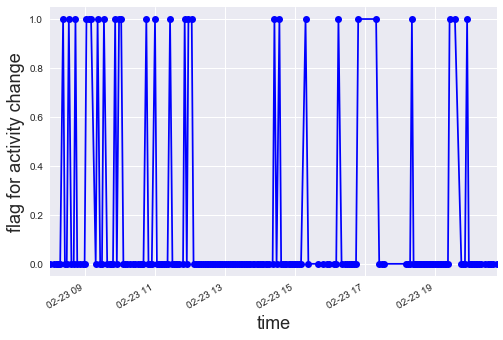

In [157]:
df3['flag'] = pd.Series(flag, index=df.index)
#plot mean of the red pixels over the course of one day
df3.loc['2015-02-23 08:00:00':'2015-02-23 21:00:00':5].flag.plot(linestyle='-',color='blue',marker='o',label='activity change')
#plt.legend(loc='upper right')

plt.ylabel('flag for activity change',fontsize= 18)
plt.xlabel('time',fontsize= 18)
plt.show()

EOF